C:\Users\avi04\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Regression Results:
MAE : 0.6066644056179011
RMSE: 4.7652226693939905
R² Score: 0.9978377118304435

Feature Importance:
   Feature  Importance
0   PM2.5    0.661769
4      CO    0.216994
1    PM10    0.119625
5      O3    0.000729
2     NO2    0.000624
3     SO2    0.000259


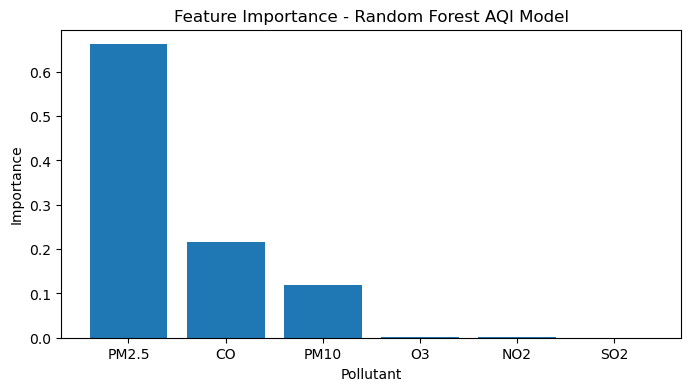

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\avi04\Downloads\city_day_descriptive_augmented.csv")


features = ["PM2.5", "PM10", "NO2", "SO2", "CO", "O3"]

X = df[features]
y = df["AQI"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regression Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R² Score:", r2)


importances = model.feature_importances_
fi = pd.DataFrame({"Feature": features, "Importance": importances})
fi = fi.sort_values("Importance", ascending=False)
print("\nFeature Importance:\n", fi)


plt.figure(figsize=(8,4))
plt.bar(fi["Feature"], fi["Importance"])
plt.title("Feature Importance - Random Forest AQI Model")
plt.xlabel("Pollutant")
plt.ylabel("Importance")
plt.show()


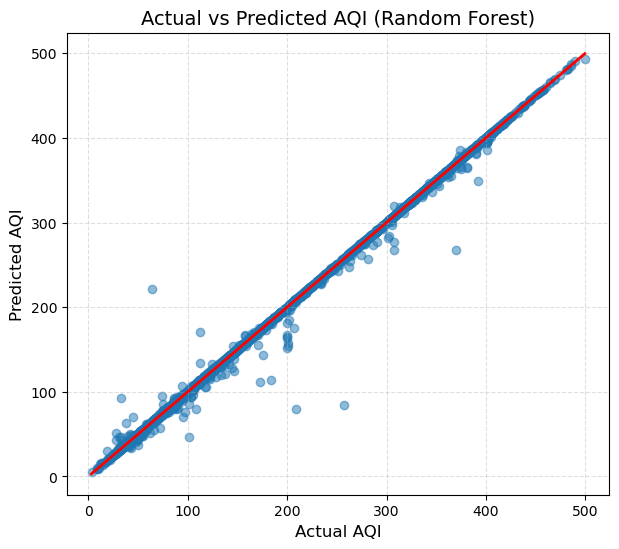

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 6))
plt.scatter(y_test, y_pred, alpha=0.5)


plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red', linewidth=2)

plt.title("Actual vs Predicted AQI (Random Forest)", fontsize=14)
plt.xlabel("Actual AQI", fontsize=12)
plt.ylabel("Predicted AQI", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)

plt.show()


In [3]:
import joblib
joblib.dump(model, "aqi_model.pkl")
print("Model saved as aqi_model.pkl")


Model saved as aqi_model.pkl
